# Inversion attack information of clients (wrt diff trainings)

>>Attack(normal training)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:

# Initialize lists to store data
state_codes = []
epochs = []
batch_sizes = []
performances = []

# Open the .out file
with open('all_clients_inversion.out', 'r') as file:
    for line in file:
        # Check if the line contains relevant information
        if 'State Code::' in line:
            state_code = line.split(':: ')[1].strip()
        elif 'Performance at' in line:
            # print(line.split(' and ')[0].split()[-2])
            epoch= line.split(' and ')[0].split()[-2]
            batch_size= line.split(' and ')[1].split()[0]
            performance_str = line.split(': ')[1].split()[0]
            
            performance = float(performance_str.strip('%'))  # Remove percentage sign and convert to float
            # Append data to lists
            state_codes.append(state_code)
            epochs.append(epoch)
            batch_sizes.append(batch_size)
            performances.append(performance)

df_normal_attack = pd.DataFrame({'State Code': state_codes, 'Epoch': epochs, 'Batch Size': batch_sizes, 'Reconstruction (%)': performances})

df_normal_attack.head()


,State Code,Epoch,Batch Size,Reconstruction (%)
0,AL,5,8,24.8
1,AK,5,8,27.2
2,AZ,5,8,20.2
3,AR,5,8,20.0
4,CA,5,8,15.7


>>Attack(Fair training)

In [3]:
import pandas as pd

# Initialize lists to store data
state_codes = []
epochs = []
batch_sizes = []
performances = []

# Open the .out file
with open('../tableak_fair_inversion/all_client_fair_inversion.out', 'r') as file:
    for line in file:
        # Check if the line contains relevant information
        if 'State Code::' in line:
            state_code = line.split(':: ')[1].strip()
        elif 'Performance at' in line:
            # print(line.split(' and ')[0].split()[-2])
            epoch= line.split(' and ')[0].split()[-2]
            batch_size= line.split(' and ')[1].split()[0]
            performance_str = line.split(': ')[1].split()[0]
            
            performance = float(performance_str.strip('%'))  # Remove percentage sign and convert to float
            # Append data to lists
            state_codes.append(state_code)
            epochs.append(epoch)
            batch_sizes.append(batch_size)
            performances.append(performance)

df_fair_attack = pd.DataFrame({'State Code': state_codes, 'Epoch': epochs, 'Batch Size': batch_sizes, 'Reconstruction (%)': performances})

df_fair_attack.head()


,State Code,Epoch,Batch Size,Reconstruction (%)
0,AL,5,8,23.9
1,AK,5,8,24.8
2,AZ,5,8,26.1
3,AR,5,8,20.3
4,CA,5,8,26.7


### Attack(DP training)

In [4]:
import pandas as pd

# Initialize lists to store data
state_codes = []
epochs = []
batch_sizes = []
performances = []

# Open the .out file
with open('../tableak_DP_inversion/all_client_DP_inversion.out', 'r') as file:
    for line in file:
        # Check if the line contains relevant information
        if 'State Code::' in line:
            state_code = line.split(':: ')[1].strip()
        elif 'Performance at' in line:
            # print(line.split(' and ')[0].split()[-2])
            epoch= line.split(' and ')[0].split()[-2]
            batch_size= line.split(' and ')[1].split()[0]
            performance_str = line.split(': ')[1].split()[0]
            
            performance = float(performance_str.strip('%'))  # Remove percentage sign and convert to float
            # Append data to lists
            state_codes.append(state_code)
            epochs.append(epoch)
            batch_sizes.append(batch_size)
            performances.append(performance)

df_dp_attack = pd.DataFrame({'State Code': state_codes, 'Epoch': epochs, 'Batch Size': batch_sizes, 'Reconstruction (%)': performances})

df_dp_attack.head()


,State Code,Epoch,Batch Size,Reconstruction (%)
0,AL,5,8,24.2
1,AK,5,8,26.5
2,AZ,5,8,26.4
3,AR,5,8,24.6
4,CA,5,8,22.5


### Attack(DP_FAIR training)

In [5]:
import pandas as pd

# Initialize lists to store data
state_codes = []
epochs = []
batch_sizes = []
performances = []

# Open the .out file
with open('../tableak_DP_FAIR_inversion/all_client_DP_FAIR_inversion.out', 'r') as file:
    for line in file:
        # Check if the line contains relevant information
        if 'State Code::' in line:
            state_code = line.split(':: ')[1].strip()
        elif 'Performance at' in line:
            # print(line.split(' and ')[0].split()[-2])
            epoch= line.split(' and ')[0].split()[-2]
            batch_size= line.split(' and ')[1].split()[0]
            performance_str = line.split(': ')[1].split()[0]
            
            performance = float(performance_str.strip('%'))  # Remove percentage sign and convert to float
            # Append data to lists
            state_codes.append(state_code)
            epochs.append(epoch)
            batch_sizes.append(batch_size)
            performances.append(performance)

df_DP_FAIR_attack = pd.DataFrame({'State Code': state_codes, 'Epoch': epochs, 'Batch Size': batch_sizes, 'Reconstruction (%)': performances})

df_DP_FAIR_attack.head()


,State Code,Epoch,Batch Size,Reconstruction (%)
0,AL,5,8,25.4
1,AK,5,8,27.7
2,AZ,5,8,25.8
3,AR,5,8,25.4
4,CA,5,8,25.4


# Different Trainings information of the clients

>Normal training

In [6]:
import pandas as pd

state_codes = []
data_lengths = []
validation_accs = []
validation_losses = []

# Open the .out file
with open('all_clients_inversion_Normal_Training_info.out', 'r') as file:
    for line in file:
        # Check if the line contains relevant information
        if line.startswith('data points_'):
            # print(line.split('_')[-1].strip()[:2])
            state_code = line.split('_')[-1].strip()[:2] 
            data_length = int(line.split()[-1])  
            state_codes.append(state_code)
            data_lengths.append(data_length)
        elif line.startswith('Validation Loss:'):
            validation_loss = float(line.split(',')[0].split(': ')[1])
            validation_acc = float(line.split(',')[1].split(': ')[1])
            validation_losses.append(validation_loss)
            validation_accs.append(validation_acc)

df_normal_training_info = pd.DataFrame({
    'State Code': state_codes,
    'Length of Training Data': data_lengths,
    'Validation Accuracy': validation_accs,
    'Validation Loss': validation_losses
})

df_normal_training_info.head()

,State Code,Length of Training Data,Validation Accuracy,Validation Loss
0,AL,17824,0.7999,0.4115
1,AK,2848,0.7729,0.4661
2,AZ,26624,0.8054,0.4169
3,AR,11168,0.8108,0.4168
4,CA,156544,0.8119,0.4075


>Fairness training info

In [7]:
import pandas as pd

state_codes = []
data_lengths = []
validation_accs = []
validation_losses = []

# Open the .out file
with open('all_clients_inversion_fair_Training_info.out', 'r') as file:
    for line in file:
        # Check if the line contains relevant information
        if line.startswith('data points_'):
            # print(line.split('_')[-1].strip()[:2])
            state_code = line.split('_')[-1].strip()[:2] 
            data_length = int(line.split()[-1])  
            state_codes.append(state_code)
            data_lengths.append(data_length)
        elif line.startswith('Validation Loss:'):
            validation_loss = float(line.split(',')[0].split(': ')[1])
            validation_acc = float(line.split(',')[1].split(': ')[1])
            validation_losses.append(validation_loss)
            validation_accs.append(validation_acc)

df_fair_training_info = pd.DataFrame({
    'State Code': state_codes,
    'Length of Training Data': data_lengths,
    'Validation Accuracy': validation_accs,
    'Validation Loss': validation_losses
})

df_fair_training_info.head()

,State Code,Length of Training Data,Validation Accuracy,Validation Loss
0,AL,17824,0.8037,0.8219
1,AK,2848,0.7757,0.8838
2,AZ,26624,0.8044,0.8389
3,AR,11168,0.8108,0.8747
4,CA,156544,0.8114,0.8165


In [8]:
# df_fair_training_info

>DP training info

In [9]:
import pandas as pd

state_codes = []
data_lengths = []
validation_accs = []
validation_losses = []

# Open the .out file
with open('all_clients_inversion_DP_Training_info.out', 'r') as file:
    for line in file:
        # Check if the line contains relevant information
        if line.startswith('data points_'):
            # print(line.split('_')[-1].strip()[:2])
            state_code = line.split('_')[-1].strip()[:2] 
            data_length = int(line.split()[-1])  
            state_codes.append(state_code)
            data_lengths.append(data_length)
        elif line.startswith('Validation Loss:'):
            validation_loss = float(line.split(',')[0].split(': ')[1])
            validation_acc = float(line.split(',')[1].split(': ')[1])
            validation_losses.append(validation_loss)
            validation_accs.append(validation_acc)

df_dp_training_info = pd.DataFrame({
    'State Code': state_codes,
    'Length of Training Data': data_lengths,
    'Validation Accuracy': validation_accs,
    'Validation Loss': validation_losses
})

df_dp_training_info.head()

,State Code,Length of Training Data,Validation Accuracy,Validation Loss
0,AL,17824,0.8069,0.4137
1,AK,2848,0.7645,0.4745
2,AZ,26624,0.7994,0.4246
3,AR,11168,0.8162,0.4117
4,CA,156544,0.8036,0.4219


>DP_FAIR traning info

In [10]:
import pandas as pd

state_codes = []
data_lengths = []
validation_accs = []
validation_losses = []

# Open the .out file
with open('all_clients_inversion_DP_FAIR_Training_info.out', 'r') as file:
    for line in file:
        # Check if the line contains relevant information
        if line.startswith('data points_'):
            # print(line.split('_')[-1].strip()[:2])
            state_code = line.split('_')[-1].strip()[:2] 
            data_length = int(line.split()[-1])  
            state_codes.append(state_code)
            data_lengths.append(data_length)
        elif line.startswith('Validation Loss:'):
            validation_loss = float(line.split(',')[0].split(': ')[1])
            validation_acc = float(line.split(',')[1].split(': ')[1])
            validation_losses.append(validation_loss)
            validation_accs.append(validation_acc)

df_DP_FAIR_training_info = pd.DataFrame({
    'State Code': state_codes,
    'Length of Training Data': data_lengths,
    'Validation Accuracy': validation_accs,
    'Validation Loss': validation_losses
})

df_DP_FAIR_training_info.head()

,State Code,Length of Training Data,Validation Accuracy,Validation Loss
0,AL,17824,0.8028,0.8294
1,AK,2848,0.7842,0.8874
2,AZ,26624,0.8021,0.8357
3,AR,11168,0.8176,0.8249
4,CA,156544,0.8113,0.8165


In [11]:
merged_normal=pd.merge(df_normal_attack, df_normal_training_info, on='State Code')
merged_fair=pd.merge(df_fair_attack, df_fair_training_info, on='State Code')
merged_dp=pd.merge(df_dp_attack,df_dp_training_info , on='State Code')
merged_dp_fair=pd.merge(df_DP_FAIR_attack,df_DP_FAIR_training_info , on='State Code')


# Group level information (Male and Female)

In [12]:

path = "50_clients_data/raw_data/*.data"
file_list = glob.glob(path)

print(len(file_list))
column_names = ['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX', 'RAC1P', 'PINCP']

k = 0
temp = []
for file in file_list:
    if k == 1:
        break
    name = file.split('/')[-1].split('.')[0]
    df = pd.read_csv(file, names=column_names)
    sex_count = df['SEX'].value_counts()
    female_to_male_ratio = sex_count[2] / sex_count[1]

    temp.append({'State Code': name, 'Female_to_male_ratio': female_to_male_ratio})

df_female_to_male_ratio = pd.DataFrame(temp)
df_female_to_male_ratio.head()

50


,State Code,Female_to_male_ratio
0,VT,0.950162
1,TX,0.885179
2,MI,0.900252
3,UT,0.851920
4,RI,1.017219


In [13]:
merged_normal_FM_ratio=pd.merge(merged_normal, df_female_to_male_ratio, on='State Code')
merged_fair_FM_ratio=pd.merge(merged_fair, df_female_to_male_ratio, on='State Code')
merged_dp_FM_ratio=pd.merge(merged_dp,df_female_to_male_ratio , on='State Code')
merged_dp_fair_FM_ratio=pd.merge(merged_dp_fair,df_female_to_male_ratio , on='State Code')

In [14]:
merged_normal_FM_ratio.head()

,State Code,Epoch,Batch Size,Reconstruction (%),Length of Training Data,Validation Accuracy,Validation Loss,Female_to_male_ratio
0,AL,5,8,24.8,17824,0.7999,0.4115,0.916102
1,AK,5,8,27.2,2848,0.7729,0.4661,0.821452
2,AZ,5,8,20.2,26624,0.8054,0.4169,0.895813
3,AR,5,8,20.0,11168,0.8108,0.4168,0.935557
4,CA,5,8,15.7,156544,0.8119,0.4075,0.894212


# Sub-Group level information (White Male and Black Female)

In [15]:
path = "50_clients_data/raw_data/*.data"
file_list = glob.glob(path)

print(len(file_list))
dataframes = []
column_names = ['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX', 'RAC1P', 'PINCP']

k = 0
temp = []
for file in file_list:
    if k == 1:
        break
    name = file.split('/')[-1].split('.')[0]
    df = pd.read_csv(file, names=column_names)
    sex_count = df['SEX'].value_counts()
    Female_to_male_ration = sex_count[2] / sex_count[1]

    intersection_counts = df.groupby(['SEX', 'RAC1P']).size()

    # Get counts for each intersectional combination
    intersection_11 = intersection_counts.get((1, 1), 0)
    intersection_12 = intersection_counts.get((1, 2), 0)
    intersection_21 = intersection_counts.get((2, 1), 0)
    intersection_22 = intersection_counts.get((2, 2), 0)

    b_female_to_w_male_ratio = intersection_22 / intersection_11
    temp.append({'State Code': name, 'BF_to_WM_ratio': b_female_to_w_male_ratio})
    # print(name)
    # print(b_female_to_w_male_ratio)

df_b_female_to_w_male_ratio = pd.DataFrame(temp)
df_b_female_to_w_male_ratio.head()

50


,State Code,BF_to_WM_ratio
0,VT,0.006702
1,TX,0.118382
2,MI,0.087523
3,UT,0.007299
4,RI,0.058824


In [16]:
merged_normal_subG_ratio=pd.merge(merged_normal_FM_ratio, df_b_female_to_w_male_ratio, on='State Code')
merged_fair_subG_ratio=pd.merge(merged_fair_FM_ratio, df_b_female_to_w_male_ratio, on='State Code')
merged_dp_subG_ratio=pd.merge(merged_dp_FM_ratio,df_b_female_to_w_male_ratio , on='State Code')
merged_dp_fair_subG_ratio=pd.merge(merged_dp_fair_FM_ratio,df_b_female_to_w_male_ratio , on='State Code')

In [17]:
normal_final=merged_normal_subG_ratio.sort_values(by='Length of Training Data', ascending=True)
normal_final.head()

,State Code,Epoch,Batch Size,Reconstruction (%),Length of Training Data,Validation Accuracy,Validation Loss,Female_to_male_ratio,BF_to_WM_ratio
49,WY,5,8,24.4,2464,0.7614,0.4867,0.866717,0.005828
1,AK,5,8,27.2,2848,0.7729,0.4661,0.821452,0.027368
44,VT,5,8,22.5,3040,0.7955,0.4750,0.950162,0.006702
33,ND,5,8,26.1,3584,0.7618,0.4647,0.815588,0.006145
7,DE,5,8,17.1,3776,0.7813,0.4578,0.962520,0.223113


In [18]:
fair_final=merged_fair_subG_ratio.sort_values(by='Length of Training Data', ascending=True)
fair_final.head()

,State Code,Epoch,Batch Size,Reconstruction (%),Length of Training Data,Validation Accuracy,Validation Loss,Female_to_male_ratio,BF_to_WM_ratio
49,WY,5,8,23.2,2464,0.7631,0.9852,0.866717,0.005828
1,AK,5,8,24.8,2848,0.7757,0.8838,0.821452,0.027368
44,VT,5,8,20.7,3040,0.7782,0.8967,0.950162,0.006702
33,ND,5,8,25.8,3584,0.7438,0.9576,0.815588,0.006145
7,DE,5,8,23.9,3776,0.7803,0.9233,0.962520,0.223113


In [19]:
dp_final=merged_dp_subG_ratio.sort_values(by='Length of Training Data', ascending=True)
dp_final.head()

,State Code,Epoch,Batch Size,Reconstruction (%),Length of Training Data,Validation Accuracy,Validation Loss,Female_to_male_ratio,BF_to_WM_ratio
49,WY,5,8,24.3,2464,0.7647,0.4445,0.866717,0.005828
1,AK,5,8,26.5,2848,0.7645,0.4745,0.821452,0.027368
44,VT,5,8,17.5,3040,0.7915,0.4487,0.950162,0.006702
33,ND,5,8,23.4,3584,0.7596,0.4589,0.815588,0.006145
7,DE,5,8,21.1,3776,0.7866,0.4458,0.962520,0.223113


In [20]:
dp_fair_final=merged_dp_fair_subG_ratio.sort_values(by='Length of Training Data', ascending=True)
dp_fair_final.head()

,State Code,Epoch,Batch Size,Reconstruction (%),Length of Training Data,Validation Accuracy,Validation Loss,Female_to_male_ratio,BF_to_WM_ratio
49,WY,5,8,27.5,2464,0.7647,0.9361,0.866717,0.005828
1,AK,5,8,27.7,2848,0.7842,0.8874,0.821452,0.027368
44,VT,5,8,23.4,3040,0.7782,0.9187,0.950162,0.006702
33,ND,5,8,26.4,3584,0.7461,0.9627,0.815588,0.006145
7,DE,5,8,26.7,3776,0.7749,0.9367,0.962520,0.223113


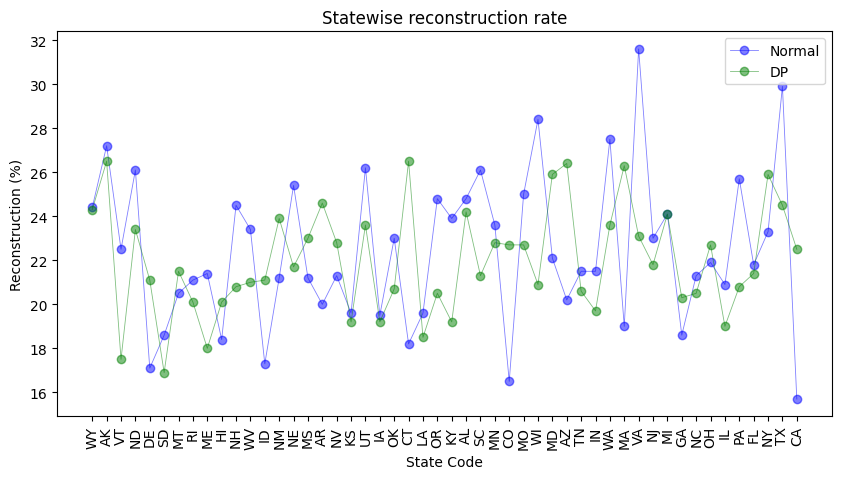

In [28]:
import matplotlib.pyplot as plt

# dataframes = [normal_final, fair_final, dp_final, dp_fair_final]
dataframes = [normal_final, dp_final]
colors = ['b', 'g', 'r', 'c'] 
labels = ['Normal', 'DP'] 
# labels = ['Normal', 'FAIR', 'DP', 'DP_FAIR'] 

plt.figure(figsize=(10, 5))

for df, color, label in zip(dataframes, colors, labels):
    plt.plot(df['State Code'], df['Reconstruction (%)'], marker='o', linestyle='-', color=color, label=label, alpha=0.5, linewidth=0.6)

plt.title('Statewise reconstruction rate')
plt.xlabel('State Code')
plt.ylabel('Reconstruction (%)')
plt.xticks(rotation=90)

plt.legend() 
plt.show()


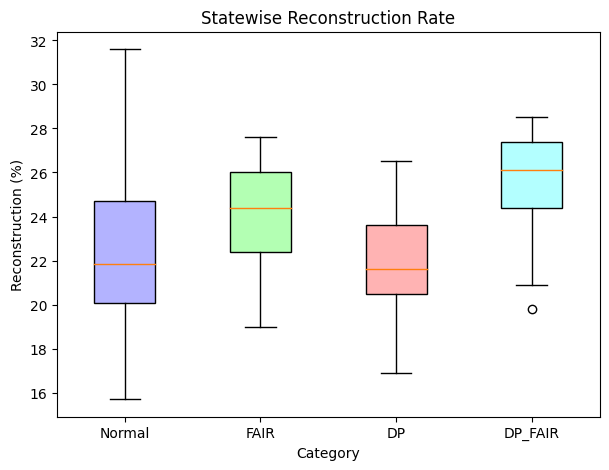

In [22]:
import matplotlib.pyplot as plt

dataframes = [normal_final, fair_final, dp_final, dp_fair_final]
labels = ['Normal', 'FAIR', 'DP', 'DP_FAIR']

# Prepare the data for boxplot
data = [df['Reconstruction (%)'] for df in dataframes]

plt.figure(figsize=(7, 5))

# Create the boxplot
box = plt.boxplot(data, patch_artist=True)

colors = [(0.7, 0.7, 1),  # Light blue
          (0.7, 1, 0.7),  # Light green
          (1, 0.7, 0.7),  # Light red
          (0.7, 1, 1)]    # Light cyan

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set the labels for the x-axis
plt.xticks(range(1, len(labels) + 1), labels)

plt.title('Statewise Reconstruction Rate')
plt.xlabel('Category')
plt.ylabel('Reconstruction (%)')

plt.show()

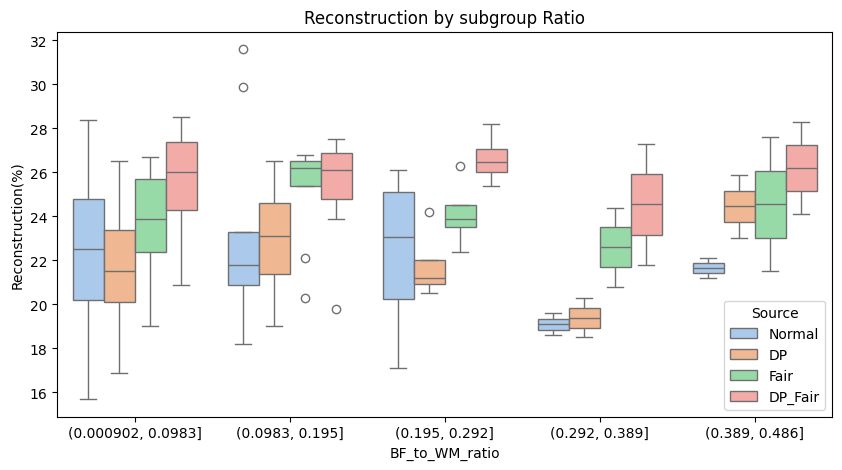

In [26]:

df = normal_final.copy()
df1 = dp_final.copy()
df2 = fair_final.copy()
df3 = dp_fair_final.copy()

# df['BF_to_WM_ratio'] = df['BF_to_WM_ratio'].round(2)
# df1['BF_to_WM_ratio'] = df1['BF_to_WM_ratio'].round(2)
# df2['BF_to_WM_ratio'] = df2['BF_to_WM_ratio'].round(2)
# df3['BF_to_WM_ratio'] = df3['BF_to_WM_ratio'].round(2)

df['Source'] = 'Normal'
df1['Source'] = 'DP'
df2['Source'] = 'Fair'
df3['Source'] = 'DP_Fair'

combined_df = pd.concat([df, df1, df2, df3])

combined_df['BF_to_WM_ratio Bin'] = pd.cut(combined_df['BF_to_WM_ratio'], bins=5)

plt.figure(figsize=(10, 5))

sns.boxplot(data=combined_df, x='BF_to_WM_ratio Bin', y='Reconstruction (%)', hue='Source',palette='pastel')

plt.xlabel('BF_to_WM_ratio')
plt.ylabel('Reconstruction(%)')
plt.title('Reconstruction by subgroup Ratio')

plt.show()


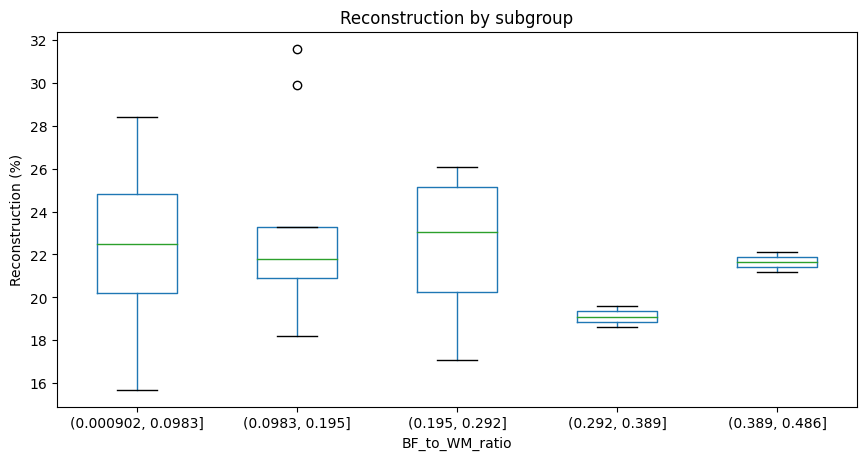

In [50]:
df=normal_final.copy()

df['BF_to_WM_ratio Bin'] = pd.cut(df['BF_to_WM_ratio'], bins=5)

plt.figure(figsize=(10, 5))

bp = df.boxplot(column='Reconstruction (%)', by='BF_to_WM_ratio Bin', ax=plt.gca(), grid=False)

plt.xlabel('BF_to_WM_ratio')
plt.ylabel('Reconstruction (%)')
plt.title('Reconstruction by subgroup')  # Set title to empty string to remove the default title
bp.get_figure().suptitle("")

# plt.savefig('boxplot.png')
plt.show()


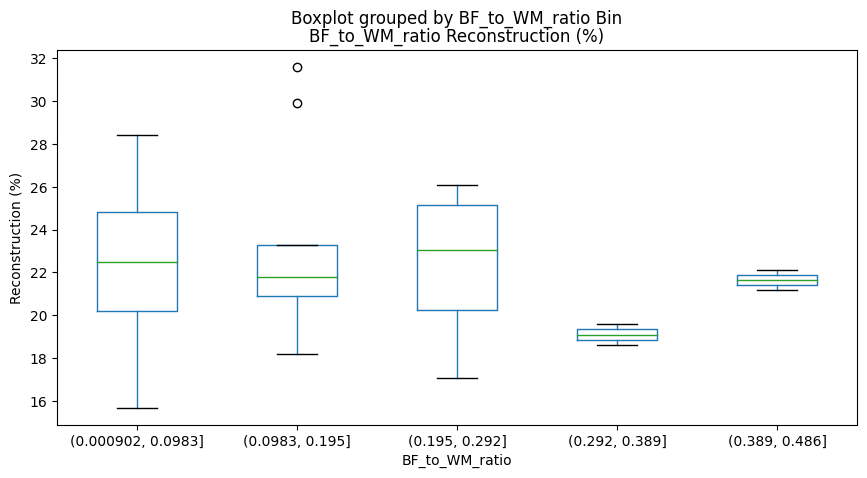

In [32]:

df=normal_final.copy()

# df['BF_to_WM_ratio'] = df['BF_to_WM_ratio'].round(2)

df['BF_to_WM_ratio Bin'] = pd.cut(df['BF_to_WM_ratio'], bins=5)

plt.figure(figsize=(10, 5))
df.boxplot(column='Reconstruction (%)', by='BF_to_WM_ratio Bin', ax=plt.gca(),grid=False)
plt.xlabel('BF_to_WM_ratio')
plt.ylabel('Reconstruction (%)')
plt.title('BF_to_WM_ratio Reconstruction (%)')
plt.show()

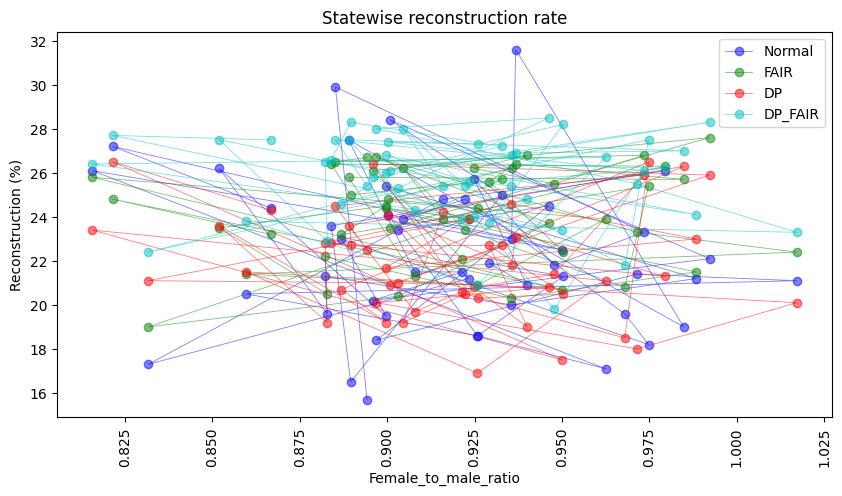

In [24]:
import matplotlib.pyplot as plt

dataframes = [normal_final, fair_final, dp_final, dp_fair_final]
colors = ['b', 'g', 'r', 'c'] 
labels = ['Normal', 'FAIR', 'DP', 'DP_FAIR'] 

plt.figure(figsize=(10, 5))

for df, color, label in zip(dataframes, colors, labels):
    plt.plot(df['Female_to_male_ratio'], df['Reconstruction (%)'], marker='o', linestyle='-', color=color, label=label, alpha=0.5, linewidth=0.6)

plt.title('Statewise reconstruction rate')
plt.xlabel('Female_to_male_ratio')
plt.ylabel('Reconstruction (%)')
plt.xticks(rotation=90)

plt.legend() 
plt.show()


# Sub-Group level information (White Male and Black Female)

In [48]:
import pandas as pd
import glob

path = "50_clients_data/raw_data/*.data"
file_list = glob.glob(path)

print(len(file_list))
dataframes = []
column_names = ['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX', 'RAC1P', 'PINCP']

k = 0
for file in file_list:
    if k == 1:
        break
    name = file.split('/')[-1].split('.')[0]
    df = pd.read_csv(file, names=column_names)
    sex_count = df['SEX'].value_counts()
    Female_to_male_ration = sex_count[2] / sex_count[1]

    intersection_counts = df.groupby(['SEX', 'RAC1P']).size()

    # Get counts for each intersectional combination
    intersection_11 = intersection_counts.get((1, 1), 0)
    intersection_12 = intersection_counts.get((1, 2), 0)
    intersection_21 = intersection_counts.get((2, 1), 0)
    intersection_22 = intersection_counts.get((2, 2), 0)

    b_female_to_W_male_ratio = intersection_22 / intersection_11
    print(name)
    print(b_female_to_W_male_ratio)
    
    # print("Sex 1 count:", sex_count[1])
    # print("Sex 2 count:", sex_count[2])

    # print("WM (Sex 1, Race 1):", intersection_11)
    # print("BM (Sex 1, Race 2):", intersection_12)
    # print("WW (Sex 2, Race 1):", intersection_21)
    # print("BW (Sex 2, Race 2):", intersection_22)


50
VT
0.006702412868632708
TX
0.11838178401680115
MI
0.08752307525247041
UT
0.0072992700729927005
RI
0.058823529411764705
CT
0.10345869204047727
IA
0.015434721042197678
SD
0.007579859231185706
AZ
0.044746376811594206
MT
0.0013869625520110957
SC
0.29047310434219054
GA
0.36110736898827966
CO
0.024444444444444446
NJ
0.1335439994504362
TN
0.1433441423463873
MS
0.48614474038202854
OR
0.013841269841269842
MD
0.39093095156303675
MO
0.079107158128795
WI
0.02688087774294671
HI
0.050672182006204755
OH
0.09736272474267792
NM
0.024074074074074074
AR
0.1277560271996703
CA
0.06821385129264572
WV
0.029548989113530325
DE
0.22311289245156982
AL
0.26625850340136054
IN
0.06577446582008972
NY
0.1707821632626256
NE
0.026328502415458938
PA
0.06534528368934339
ID
0.0030111412225233363
NH
0.013574660633484163
VA
0.19327906491337926
MN
0.026118782232573617
ME
0.008540660972892685
KY
0.06149796602057909
OK
0.0682295311406578
NV
0.09034195933456562
WY
0.005828476269775187
AK
0.02736842105263158
IL
0.111908746586

In [36]:
sex_count

SEX
1.0    1545
2.0    1468
Name: count, dtype: int64

In [32]:
df.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,19.0,1.0,18.0,5.0,4251.0,110.0,2.0,12.0,2.0,1.0,<=50K
1,55.0,1.0,14.0,2.0,20.0,34.0,0.0,60.0,1.0,1.0,<=50K
2,59.0,1.0,16.0,1.0,3500.0,54.0,1.0,40.0,2.0,1.0,<=50K
3,41.0,1.0,18.0,3.0,3500.0,362.0,0.0,36.0,2.0,1.0,<=50K
4,37.0,6.0,18.0,1.0,4920.0,34.0,0.0,35.0,1.0,1.0,<=50K
